In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [132]:
data=pd.read_csv("SalaryNaac.csv")
data.shape

(10000, 7)

In [133]:
data

,NAAC,Current course,upskill,course_hs,Shares country_hs,ranking,salary
0,B++,BE in Datascience,Datascience,IT,US,35,64500
1,A+,PG in finance,Art,IT,GERMANY,142,50800
2,B++,B.Sc,none,IT,OTHER EUROPIAN COUNTRY,31,50900
3,NO GRADE,BCom,Datascience,IT,AUSTRALIA,69,58600
4,A++,BE in others,Art,Management,OTHER ASIAN COUNTRY,129,46600
...,...,...,...,...,...,...,...
9995,B,B.Sc,Art,none,GERMANY,97,45800
9996,D,BE in others,Finance,Finance,none,197,35800
9997,C,PG in finance,IT,Finance,GERMANY,148,46700
9998,B++,BA,Art,IT,none,188,42700


<h3>Missing Values</h3>

In [134]:
for i in data.columns:
    if data[i].dtype=="O" and data[i].isnull().sum()>0:
        data[i].fillna("Missing",inplace=True)
    elif data[i].isnull().sum()>0:
        data[i].fillna(data[i].median(),inplace=True)
        
        

<h4>Feature Engineering</h4>

In [135]:
CategoricalFeatures=[feature for feature in data.columns if data[feature].dtype=='O']
CategoricalFeatures.remove('NAAC')

In [136]:
# for feature in CategoricalFeatures:
#     labels_ordered=data.groupby([feature])['salary'].mean().sort_values().index
#     labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
#     data[feature]=data[feature].map(labels_ordered)
# data

In [137]:
Manipulation={'NAAC':[['NO GRADE','D','C','B','B+','B++','A','A+','A++'],[0,1,2,3,4,5,6,7,8]],
              'upskill':[['none','Datascience','Art','IT','Finance','Managment'],[0,1,2,3,4,5]],
              'Current course':[['BE in Datascience', 'PG in finance', 'B.Sc', 'BCom','BE in others', 'PG in HR', 'PG in Marketing','BE in cse,electronics,IT,Telecom', 'CA', 'BA','PG in datascience'],[0,1,2,3,4,5,6,7,8,9,10]],
              'course_hs':[['none','IT', 'Management', 'Engineering', 'Economics','Finance', 'others'],[0,1,2,3,4,5,6]],
              'Shares country_hs':[['none','US', 'GERMANY', 'OTHER EUROPIAN COUNTRY', 'AUSTRALIA',
       'OTHER ASIAN COUNTRY', 'UK', 'CANADA', 'INDIA'],[0,1,2,3,4,5,6,7,8]]}

In [138]:
data['NAAC'].replace(Manipulation['NAAC'][0],Manipulation['NAAC'][1],inplace=True)



In [139]:
data['upskill'].replace(Manipulation['upskill'][0],Manipulation['upskill'][1],inplace=True)

In [140]:
data['Current course'].replace(Manipulation['Current course'][0],Manipulation['Current course'][1],inplace=True)

In [141]:
data['course_hs'].replace(Manipulation['course_hs'][0],Manipulation['course_hs'][1],inplace=True)

In [142]:
data['Shares country_hs'].replace(Manipulation['Shares country_hs'][0],Manipulation['Shares country_hs'][1],inplace=True)

In [113]:
data

,NAAC,Current course,upskill,course_hs,Shares country_hs,ranking,salary
0,5,0,1,1,1,35,64500
1,7,1,2,1,2,142,50800
2,5,2,0,1,3,31,50900
3,0,3,1,1,4,69,58600
4,8,4,2,2,5,129,46600
...,...,...,...,...,...,...,...
9995,3,2,2,0,2,97,45800
9996,1,4,4,5,0,197,35800
9997,2,1,3,5,2,148,46700
9998,5,9,2,1,0,188,42700


In [114]:
# data['ranking']=200-data['ranking']

<h4> Scaling the Data</h4>

[]

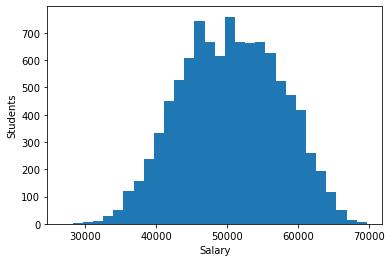

In [143]:
plt.hist(data['salary'],bins=30)
plt.xlabel("Salary")
plt.ylabel("Students")
plt.plot()

In [144]:
data=data[data['salary']!=0]
data['salary']=np.log(data['salary'])
    

[]

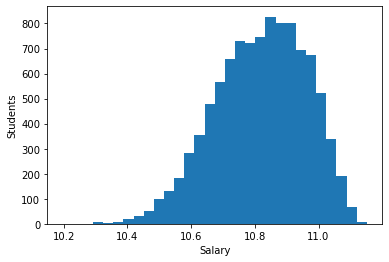

In [117]:
plt.hist(data['salary'],bins=30)
plt.xlabel("Salary")
plt.ylabel("Students")
plt.plot()

In [145]:
features=data.columns.delete(-1)

data=pd.get_dummies(data,columns=['NAAC','Current course','upskill','course_hs','Shares country_hs'])
data.shape

(10000, 44)

In [123]:
# features=data.columns.delete(-1)
    
# from sklearn.preprocessing import MinMaxScaler
# scale=MinMaxScaler()
# scale.fit(data[features])
# arr=scale.transform(data[features])



In [124]:
# dataset=pd.concat([pd.DataFrame(arr,columns=features),data['salary']],axis=1)
# dataset
# # pd.DataFrame(arr,columns=features)

,NAAC,Current course,upskill,course_hs,Shares country_hs,ranking,salary
0,0.625,0.0,0.2,0.166667,0.125,0.830,11.074421
1,0.875,0.1,0.4,0.166667,0.250,0.295,10.835652
2,0.625,0.2,0.0,0.166667,0.375,0.850,10.837618
3,0.000,0.3,0.2,0.166667,0.500,0.660,10.978490
4,1.000,0.4,0.4,0.333333,0.625,0.360,10.749356
...,...,...,...,...,...,...,...
9995,0.375,0.2,0.4,0.000000,0.250,0.520,10.732039
9996,0.125,0.4,0.8,0.833333,0.000,0.020,10.485703
9997,0.250,0.1,0.6,0.833333,0.250,0.265,10.751499
9998,0.625,0.9,0.4,0.166667,0.000,0.065,10.661954


<h3>Building Models</h3>

In [151]:
SelectedFeatures=data.columns.delete(1)
SelectedFeatures

Index(['ranking', 'NAAC_0', 'NAAC_1', 'NAAC_2', 'NAAC_3', 'NAAC_4', 'NAAC_5',
       'NAAC_6', 'NAAC_7', 'NAAC_8', 'Current course_0', 'Current course_1',
       'Current course_2', 'Current course_3', 'Current course_4',
       'Current course_5', 'Current course_6', 'Current course_7',
       'Current course_8', 'Current course_9', 'Current course_10',
       'upskill_0', 'upskill_1', 'upskill_2', 'upskill_3', 'upskill_4',
       'upskill_5', 'course_hs_0', 'course_hs_1', 'course_hs_2', 'course_hs_3',
       'course_hs_4', 'course_hs_5', 'course_hs_6', 'Shares country_hs_0',
       'Shares country_hs_1', 'Shares country_hs_2', 'Shares country_hs_3',
       'Shares country_hs_4', 'Shares country_hs_5', 'Shares country_hs_6',
       'Shares country_hs_7', 'Shares country_hs_8'],
      dtype='object')

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [152]:
Model1Features=['NAAC_0', 'NAAC_1', 'NAAC_2', 'NAAC_3', 'NAAC_4', 'NAAC_5',
       'NAAC_6', 'NAAC_7', 'NAAC_8', 'Current course_0', 'Current course_1',
       'Current course_2', 'Current course_3', 'Current course_4',
       'Current course_5', 'Current course_6', 'Current course_7',
       'Current course_8', 'Current course_9', 'Current course_10',
       'upskill_0', 'upskill_1', 'upskill_2', 'upskill_3', 'upskill_4',
       'upskill_5']
Model2Features=['NAAC_0', 'NAAC_1', 'NAAC_2', 'NAAC_3', 'NAAC_4', 'NAAC_5',
       'NAAC_6', 'NAAC_7', 'NAAC_8','course_hs_0', 'course_hs_1', 'course_hs_2', 'course_hs_3',
       'course_hs_4', 'course_hs_5', 'course_hs_6', 'Shares country_hs_0',
       'Shares country_hs_1', 'Shares country_hs_2', 'Shares country_hs_3',
       'Shares country_hs_4', 'Shares country_hs_5', 'Shares country_hs_6',
       'Shares country_hs_7', 'Shares country_hs_8','ranking']


TrainX1,TestX1,TrainX2,TestX2,TrainY,TestY=train_test_split(data[Model1Features],data[Model2Features],data['salary'],train_size=0.8,random_state=101)



In [153]:
import joblib

In [154]:

Model1=LinearRegression()
Model1.fit(TrainX1,TrainY)
Model1.score(TestX1,TestY)
joblib.dump(Model1,'Model1.pkl')
joblib.dump(TestX1,'TestX1.pkl')
# Model1.predict()

0.1400051363994801

In [155]:
Model2=LinearRegression()
Model2.fit(TrainX2,TrainY)
Model2.score(TestX2,TestY)


0.8590892695024052

<h4>Predicting Salaries</h4>

In [70]:
DataToPredict=None

In [71]:
#data conversion is required for the given data

In [73]:
PredictedSal=Model1.predict(DataToPredict[Model1Features])


TypeError: 'NoneType' object is not subscriptable

In [159]:
PredictedSal2=Model2.predict(DataToPredict[Model2Features])

TypeError: 'NoneType' object is not subscriptable

In [173]:
df=pd.read_csv('test.csv')
df['NAAC'].replace(Manipulation['NAAC'][0],Manipulation['NAAC'][1],inplace=True)
df

,NAAC,Current course,upskill,course_hs,Shares country_hs,ranking,salary,NAAC_1,NAAC_2,NAAC_3,NAAC_4,NAAC_5,NAAC_6,NAAC_7
0,5,BE in Datascience,Datascience,IT,US,35,64500,0,0,0,0,0,0,0


In [165]:
df=pd.get_dummies(df,columns=['NAAC'])

In [166]:
df

,Current course,upskill,course_hs,Shares country_hs,ranking,salary,NAAC_1,NAAC_2,NAAC_3,NAAC_4,NAAC_5,NAAC_6,NAAC_7,NAAC_5
0,BE in Datascience,Datascience,IT,US,35,64500,0,0,0,0,0,0,0,1


In [167]:
df.columns

Index(['Current course', 'upskill', 'course_hs', 'Shares country_hs',
       'ranking', 'salary', 'NAAC_1', 'NAAC_2', 'NAAC_3', 'NAAC_4', 'NAAC_5',
       'NAAC_6', 'NAAC_7', 'NAAC_5'],
      dtype='object')

In [177]:
i=str(df.at[0,'NAAC'])
df['NAAC_'+i]
# print(i)

0    0
Name: NAAC_5, dtype: int64